# Part 4 - Cost-Benefit Analysis & Conclusion

--- 

West Nile virus (WNV) is the leading cause of mosquito-borne disease in the US, and it is spread to people by the bite of an infected mosquito, specifically a Culex pipiens mosquito. One in five infected people with WNV would experience fever, nausea, headache and muscle aches lasting from a few days to a few weeks - while the remaining four out of five would not exhibit any symptoms. To date, the virus remains a major concern as individuals with weaker immune systems and those above 60 are at higher risk for severe illness from WNV - raking up medical costs and creating more burden in the healthcare system. 

Every year the Chicago Department of Public Health (CDPH) runs a comprehensive surveillance program in suburban areas to trap mosquitoes and test them for WNV. This data has helped CDPH target high-risk areas for the virus and significantly reduce the number of positive cases in the last few years. ([source](https://www.chicago.gov/content/dam/city/depts/cdph/statistics_and_reports/CDInfo_2013_JULY_WNV.pdf))

However in 2021, Chicago was ranked one of the top five US cities with mosquitoes - putting its residents at risk of contracting WNV. ([source](https://www.fox32chicago.com/news/chicago-to-spray-insecticide-to-protect-against-west-nile-virus)). Furthermore in the last two years, much of the public efforts and funding were focused on keeping the city safe from COVID-19. Now, ahead of the looming recession and tightening of budgets ([source](https://www.economist.com/the-world-ahead/2022/11/18/why-a-global-recession-is-inevitable-in-2023)), the CDPH recognized an urgency to plan ahead and be prudent about spending. 

Our team at the Disease and Treatment Agency was tasked to analyze the years with more severe WNV outbreak and devise a plan to identify potential hotspots, ahead of the 2023 summer period.

## Problem Statement
To build a model with more than **70% recall** to predict the period and location where mosquitoes will test positive for WNV, enabling CDPH to preemptively allocate the city’s spraying resources to curb the virus transmission.

## Content:

1. [Cost-Benefit Analysis](#Cost---Benefit-Analysis)
2. [Limitations](#Limitations)
3. [Conclusions](#Conclusions)
4. [Recommendations](#Recommendations)

## Links To Previous Notebooks:
- [Part 1: Data Cleaning](Part_1_WNV_Cleaning.ipynb)
- [Part 2: Exploratory Data Analysis](Part_2_WNV_EDA.ipynb)
- [Part 3: Modeling & Tuning](Part_3_WNV_Modeling.ipynb)

## Cost-Benefit Analysis

In [1]:
# Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Based on the spraying efforts done in 2011 and 2013 [(Part 2: Exploratory Data Analysis)](Part_2_WNV_EDA.ipynb), 
- The 2011 efforts were done towards the end of summer, which did not have an impact on the mosquito count and WNV presence.
- In 2013, spraying was done more often from mid-season and we can see that there is some impact on the mosquito count and virus presence. However the effect does take a while to work, suggesting that the spraying efforts should be done earlier. 
- In 2013 as well, we saw that virus count continue to rise in the mid-summer period despite spraying efforts - suggesting that a targeted approach may be better for high-risk areas.

As part of the cost-benefit analysis, we looked into external research to better understand the cost involved for spraying efforts and hospitalization. We also looked at the human cases over the years to get a better sense of potential spread to human and the impact. 

### Spraying Cost

At present, the city of Chicago currently use the Zenivex E4 insecticide for spraying, where only 1.5 fluid ounces (three tablespoons) per acre is applied. [(source)](https://www.nbcchicago.com/news/local/chicago-begins-west-nile-virus-prevention/1958957/)

Based on an online flyer, the Zenivex E20 adulticide costs approximately 67 cents per acre, which we will use as an estimate for our cost projection. [(source)](https://www.centralmosquitocontrol.com/-/media/project/oneweb/centralmosquitocontrol/files/us/resources-lit-files/zenivex-cost-comparison-fact-sheet.pdf)

The entire Chicago city area is roughly $607.4km^2$, equals to approximately 150,092 acres. [(source)](https://en.wikipedia.org/wiki/Community_areas_in_Chicago)

Typically the CDPH would announce spray operations through the media, list of announcements in the last few years:
- 2013, [Chicago Begins Spraying For Mosquitoes Wednesday](https://www.nbcchicago.com/news/local/chicago-begins-west-nile-virus-prevention/1958957/)
- 2017, [City To Spray For Mosquitoes For First Time, Targeting Far South Side](https://www.cbsnews.com/chicago/news/spray-mosquitoes-far-south-side-west-nile-prevention/)
- 2021, [4 North Side Neighborhoods Targeted for Mosquito Spraying as Risk of West Nile Virus Now ‘High’](https://news.wttw.com/2021/08/23/north-side-targeted-mosquito-spraying-risk-west-nile-virus-now-high)
- 2022, [Mosquito Spray On Thursday, September 8, 2022](http://www.downers.us/top-stories/2022/09/07/mosquito-spray-on-thursday-september-8-2022)
    
Based on these announcements, the city usually targets 3-4 neighborhoods per year. We can estimate that size of a selected area based on the 2021 news that covered 4 north side (Albany Park, Irving Park, Lincoln Square and North Center) is $25.22km^2$, which is approximately 6,232 acres. [(source)](https://en.wikipedia.org/wiki/Community_areas_in_Chicago)

In the calculation below, we'll explore cost options to spray all of Chicago city area vs. selected area, using the below measurements:
1. Cost of spraying insecticide per acre at **67 cents.**
2. The full Chicago area **150,092 acres.** 
3. We'll assume one round of spray will cover four neighborhoods of **6,232 acres.**

### Economic Cost

While there are several studies on the economic burden of WNV, we'll be referencing one of the more recent studies in 2014 to account for relevance and inflation. In this study, [Initial and Long-Term Costs of Patients Hospitalized with West Nile Virus Disease](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3945683/) the researchers used the below key factors to identify the economic cost:
1. Direct and indirect medical costs for WNV patients across different level of severity*
2. Long-term costs incurred within 5 years after initial hospitalization
3. Lost productivity costs where patients would lose out on the opportunity to earn and contribute to the economy

Below [table](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3945683/table/T4/?report=objectonly) is a breakdown of the estimated cost incurred for WNV, per patient:

*Only 1 in 5 patients exhibit symptoms and these tend to be patients with weaker immune system - putting them at higher risk, especially if they have an existing illness.

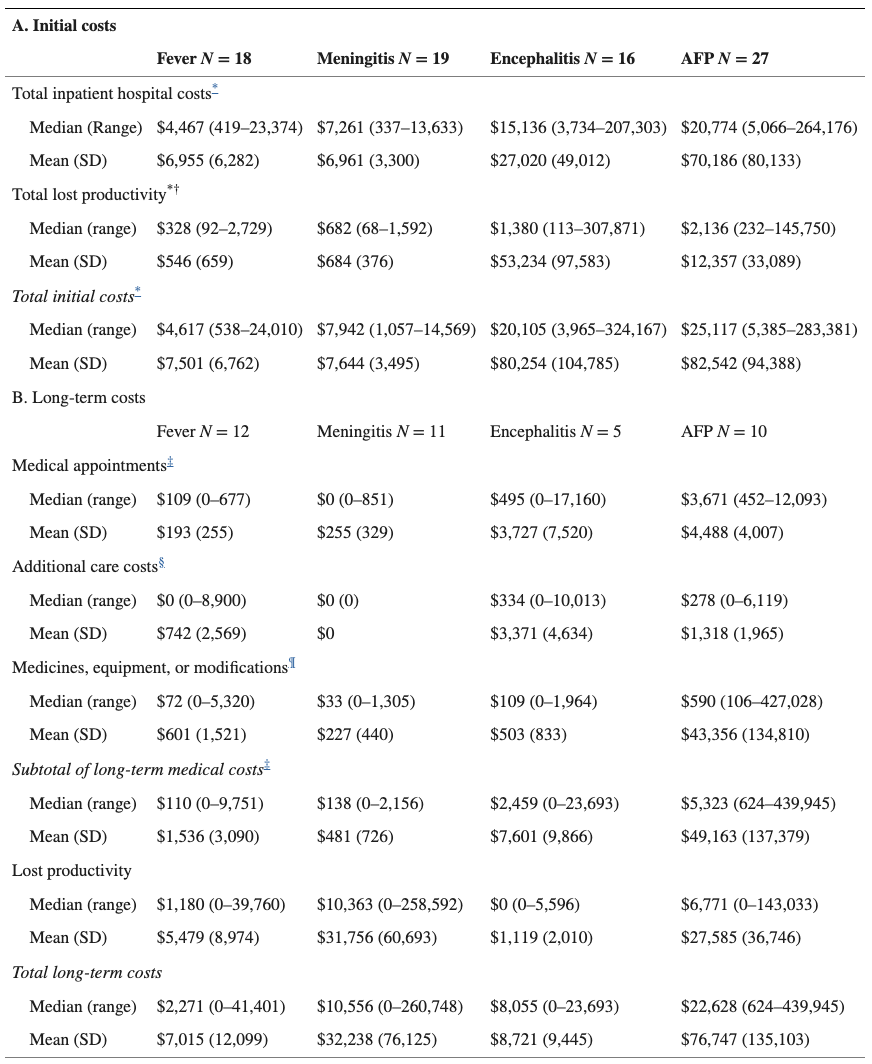
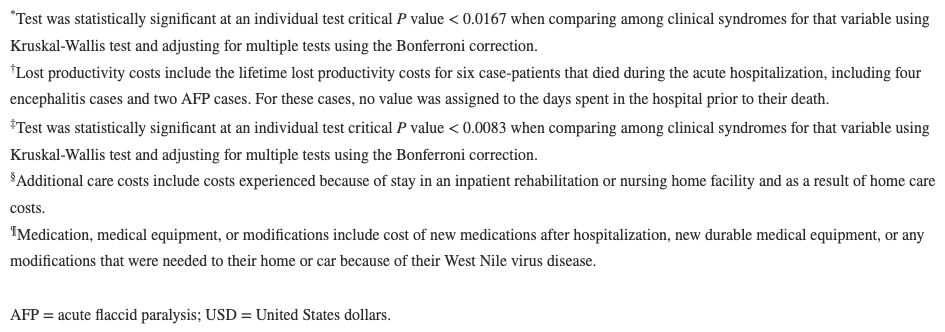

Based on the snapshot above, we'll be using:
- The highest median for initial medical and productivity cost: **USD25,117**
- The highest median for total long-term costs including productivity per patient in our analysis: **USD22,628**

In [2]:
# Calculate total initial and long-term medical cost

total_cost = 25117 + 22628
print(f'The total initial and long-term medical cost and productivity loss is USD{total_cost}')

The total initial and long-term medical cost and productivity loss is USD47745


### Positive human cases

For better cost accuracy, we reviewed the number of positive human cases against number of positive mosquito pools tested. This [table](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7241786/table/pone.0227160.t002/?report=objectonly) contains annual cases in Chicago, along with the Cook and DuPage counties. Cases from Chicago makes up 66% of all the human cases, which we will use to calculate approximation.

While our dataset only contains information from 2007 to 2014, we'll use the full dataset from the study for more accurate representation of average human cases.

*MIR refers to mosquito infection rate*

In [3]:
# Load table downloaded from https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7241786/table/pone.0227160.t002/?report=objectonly

cases = pd.read_csv('../assets/annual_wnv_cases.csv')
cases

,Year,Number of human cases,Average MIR,Number of pools tested,Number of positive pools,Total number of mosquitoes tested
0,2005,181,5.33,7165,1939,271235
1,2006,129,5.35,9428,1984,318386
2,2007,43,2.65,12131,1259,375520
3,2008,10,1.91,9024,587,298995
4,2009,1,1.14,9450,298,311220
5,2010,47,5.19,11491,2086,393279
6,2011,24,3.10,8911,939,287774
7,2012,229,7.35,10162,3182,323497
8,2013,66,4.26,11078,1967,407326
9,2014,31,2.97,9273,990,333489


In [4]:
cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 6 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Year                               12 non-null     int64  
 1   Number of human cases              12 non-null     int64  
 2   Average MIR                        12 non-null     float64
 3   Number of pools tested             12 non-null     int64  
 4   Number of positive pools           12 non-null     int64  
 5   Total number of mosquitoes tested  12 non-null     int64  
dtypes: float64(1), int64(5)
memory usage: 704.0 bytes


Based on our dataset and media reports, we know that the city was spraying from 2011 onwards. So we can assume that the years before 2011 did not have any spraying efforts. We'll calculate the average human cases before and after spray:

In [5]:
# Average cases before 2011 (no spraying)
# Multiple 66% to get the Chicago average

0.66 * (cases.loc[cases['Year'] < 2011, 'Number of human cases'].mean())

45.21

In [6]:
# Calculating max no. cases in Chicago using 2005 figure (no spraying)

0.66 * 181

119.46000000000001

In [7]:
# Average cases from 2011 onwards (with spraying)
# Multiple 66% to get the Chicago average

0.66 * (cases.loc[cases['Year'] > 2010, 'Number of human cases'].mean())

54.339999999999996

Unfortunately, the figure before 2011 is not very representative because the city tested on fewer pools in years with low cases. Hence, for the years before spraying started, we'll take the highest count of human cases which is in 2005 - **119 positive human cases** (no spray).

For years with spraying effort, we'll take the average count of **54**.

#### Option 1: Spray every area

In an ideal scenario, we would be able to spray the entire city more often to ensure full coverage. Let's take a look at the cost: 

In [8]:
# Calculate cost to spray entire land size of Chicago
# We'll round up the figure as we are not factoring in cost for truck and labor to spray the entire area

per_acre = 0.67
full_spray = per_acre * 150092
print(f'The cost to spray the entire city once is USD{full_spray}')

The cost to spray the entire city once is USD100561.64


In [9]:
# Calculate cost to spray for peak summer period months only (July to September)

full_spray_period = full_spray * 12
print(f'The cost to spray the entire city every week for 3 months is USD{full_spray_period}')

The cost to spray the entire city every week for 3 months is USD1206739.68


In [10]:
# Calculate hospitalization cost & productivity loss for average positive human cases

full_spray_cases = 0
hosp_full_spray = total_cost * full_spray_cases
print(f'Assuming there will be {full_spray_cases} cases per year, spraying the entire city will still see an estimated USD{hosp_full_spray} medical cost and productivity loss incurred')

Assuming there will be 0 cases per year, spraying the entire city will still see an estimated USD0 medical cost and productivity loss incurred


In [11]:
# Calculate total cost

full_spray_cost = full_spray_period + hosp_full_spray
print(f'The total cost from spraying the entire city is USD{full_spray_cost}')

The total cost from spraying the entire city is USD1206739.68


### Option 2: Not to spray at all

When we opt not to spray, we'll save on spraying cost. However, there's a risk that there will be more positive human cases:

In [12]:
# Calculate hospitalization cost & productivity loss for average positive human cases

no_spray_cases = 119
hosp_no_spray = total_cost * no_spray_cases
print(f'Assuming there will be {no_spray_cases} cases per year, not spraying will cost an estimated USD{hosp_no_spray} medical cost and productivity loss incurred')

Assuming there will be 119 cases per year, not spraying will cost an estimated USD5681655 medical cost and productivity loss incurred


### Option 3: Spray based on recall score

Using the recall score from our selected prediction model where - out of all the positive pools identified, our model predicted the outcome correctly for 73% of the pools. 

In [13]:
# Assuming we conduct one targeted spray effort:

targeted_spray = per_acre * 6232
print(f'The cost to spray targeted area in the city once is USD{targeted_spray}')

The cost to spray targeted area in the city once is USD4175.4400000000005


In [14]:
# Calculate cost to spray for peak summer period months only (July to September)
# Assuming spray will be done at different locations each time

targeted_spray_period = targeted_spray * 12
print(f'The cost to spray different targeted area in the city every week for 3 months is USD{targeted_spray_period}')

The cost to spray different targeted area in the city every week for 3 months is USD50105.280000000006


In [15]:
# Using the recall score of 73% that the spray will accurately prevent 73% of the positive human cases

targeted_cases = 54*(1-0.73)
hosp_targeted_spray = total_cost * targeted_cases
print(f'Assuming the targeted spray approach will result in {targeted_cases} cases, the city will still see an estimated USD{hosp_targeted_spray} medical cost and productivity loss incurred')

Assuming the targeted spray approach will result in 14.580000000000002 cases, the city will still see an estimated USD696122.1000000001 medical cost and productivity loss incurred


In [16]:
# Calculate total cost

targeted_spray_cost = targeted_spray_period + hosp_targeted_spray
print(f'The total cost from spraying the entire city is USD{targeted_spray_cost}')

The total cost from spraying the entire city is USD746227.3800000001


In [17]:
# Calculate cost savings
# We'll calculate the difference if there's no spraying done at all - 181 human cases

cost_diff = full_spray_cost - targeted_spray_cost
print(f'This approach has prevented {full_spray_cases - targeted_cases} cases and saved the city USD{cost_diff}')

This approach has prevented -14.580000000000002 cases and saved the city USD460512.2999999998


### Cost-Benefit Evaluation

In [18]:
cost_benefit = pd.DataFrame(data=[["Option 1: Spray All", full_spray, full_spray_period, full_spray_cases, hosp_full_spray, full_spray_cost, 0],
                                  ["Option 2: No Spray", 0, 0, no_spray_cases, hosp_no_spray, hosp_no_spray, 0],
                                  ["Option 3: Targeted Spray", targeted_spray, targeted_spray_period, targeted_cases, hosp_targeted_spray, targeted_spray_cost, cost_diff]],
                            columns=['Approach', 'USD Cost to Spray Once', 'USD Cost to Spray All Summer', 'No. Cases', 'USD Economic Cost', 'USD Total Cost', 'USD Cost Difference'])

cost_benefit

,Approach,USD Cost to Spray Once,USD Cost to Spray All Summer,No. Cases,USD Economic Cost,USD Total Cost,USD Cost Difference
0,Option 1: Spray All,100561.64,1206739.68,0.00,0.0,1206739.68,0.0
1,Option 2: No Spray,0.00,0.00,119.00,5681655.0,5681655.00,0.0
2,Option 3: Targeted Spray,4175.44,50105.28,14.58,696122.1,746227.38,460512.3


Based on the above,
- **Option 1: Spray all city area on a weekly basis** 
    - Spraying all areas in Chicago limits us from identifying the regions with hot spots accurately after the operation completes. 
    - It's more harmful for the environment with the frequent spraying and may also irritate residents with sensitive skin and sense of smell
    - Even with this approach, there are still risks of positive cases so this approach will not guarantee that the city will be free of WNV - in fact, it could lead to the city wasting more resources. 
- **Option 2: No spray at all** 
    - When we choose not to spray at all, there is a much higher risk of people contracting WNV as it's one of the more widespread adult mosquito control measure. 
    - Hence this would lead to higher hospitalization cost and productivity loss - our analysis shows that the city risks losing up to USD5,681,655. 
- **Option 3: Targeted spray in 3-4 neighborhoods per week** 
    - This appears to be the best approach as it's the lowest in spraying cost. 
    - This helps minimize environmental impact from spraying and also reduce harm to the residents.
    - Furthermore, this approach demonstrate the benefits in cost savings of **USD460,512** for spray, when compared to Option 1. 

Hence, we would recommend pursuing the targeted spraying approach:
- USD746,227 in total cost for spraying as well as medical costs and productivity loss
- USD460,512 in cost savings for spray
- While there are still a few human cases, but knowing this now will help us prepare for severe illnesses ahead of time

## Limitations 

There were several limitations in the model's ability to predict or classify the presence of WNV, including:

**1. Data availability and quality**:
- The classifier model need to rely on large amounts of high-quality data to make accurate predictions. There is insufficient data regarding spraying, as 2011 and 2013 datasets was the only spray data recorded. Data such as bird cases and human cases are also additional indicators that can be used to better detect WNV presence in areas around Chicago.
- For this project, the full effectiveness of the spray had to be predicted via feature engineering and the use of proxies to forecast subsequent years. 

**2. Limited generalizability**:
- The current model is trained on a specific dataset and may not be able to generalize to other datasets or situations. This can be a particular issue when trying to predict WNV infection, as the distribution of WNV cases can vary significantly from state to state.

## Conclusion 

In summary, our model was able to:
1. Achieve target recall more than 70%: Model's recall is 73% through the Logistic Regression Classifier 
2. This allowed us to optimize a targeted spraying approach to save **USD460,512** in spraying efforts

The final features in the model were: 
- Location (latitude and longitude)
- Rolling average temperature over past 7 and 14 days
- Rolling average difference from normal temperature over past 7 and 14 days
- Rolling average dew point over past 7 and 14 days
- Rolling average of heating degree days and cooling degree days over past 7 and 14 days
- Rolling average total daily rainfall over past 7 and 14 days
- Rolling average wind speed  over past 7 and 14 days
- Rolling average humidity  over past 7 and 14 days
- Rolling average daylight hours  over past 7 and 14 days
- Rolling average wet bulb recordings over past 7 and 14 days
- Vector
- Trap
- Months
- Weeks

## Recomendations 

Through our model and proposed targeted approach, CDPH will be able to optimize spray in terms of frequency and locations to reduce the amount of unnecessary spraying in areas where WNV is absent. Sprays should also be done when there is low wind speeds to prevent the spray from blowing away too quickly.

However on top of our model, controlling mosquito population and curbing virus transmission will require a holistic approach. This could be done in a few ways:
1. **Larviciding**: As spraying only kills off adult mosquitoes, larvicides can help aid in killing mosquito larvae before they grow into adults, helping reduce the overall population.  
2. **Repellents**: Distribute insect repellents to the general public will encourage individuals to keep their homes and household safe from mosquitoes.   
3. **Mosquito repellent screens**: These should also be installed in prime areas such as public schools or event spaces to reduce the amount of mosquitoes from entering buildings. To further support community-wide mosquito control efforts, mosquito nets can be given to locals as well. 
4. **Educational campaigns at schools**: During the summer, most American students spend a lot of time at home and can chip in to help their parents keep their houses tidy. CDPH could consider running awareness workshops at schools in the spring time, to encourage students to keep their homes clean during the summertime.
5. **Increase frequency of trash collection**: Increase frequency of trash collection where disposables such as cups and containers are thrown away more often, particularly in open areas such as parks and outdoor malls. This would help prevent creating ideal breeding conditions for mosquitoes. 
6. **Creating alerts in neighborhoods**: Similar to how Singapore keep residents informed of dengue cases, Chicago neighborhoods can consider alerting local residents whenever WNV is detected. This can be done with a flyer on notice board or text alert that indicates active WNV virus in the community. 

The quest to improve the recall and accuracy of our WNV virus detection model is an ongoing one, which we can achieve by:
1. Keeping closer track of spray data from the last few years.
2. Including other variables, such as human cases and dead bird cases.
3. Using local neighborhood's weather data for higher location accuracy. 